## Exercise 4.9 Part 2

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Load the file

In [2]:
path = r'C:\Users\Jaime Andres Suarez\Instacart Basket Analysis'
df=pd.read_pickle(os.path.join(path,'02 Data', 'Transformed Data', 'orders_products_combined_2.pkl'))
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


## 2. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

### Subsetting the DF

#### Create the list with the random numbers

In [4]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

#### Create two dataframes small: 30% big: 70%.

In [5]:
big = df[dev]

In [6]:
small = df[~dev]

#### Check the lenghts of the two dataframes

In [9]:
df.shape

(32404859, 32)

In [10]:
len(small)

9721098

In [11]:
len(big)

22683761

### Histogram

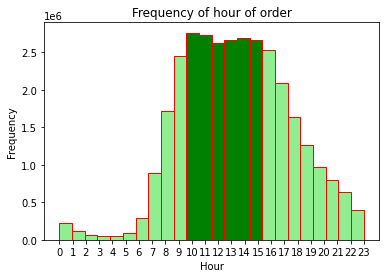

In [66]:
n,bins,patches=plt.hist(df['order_hour_of_day'], bins=24 ,color='lightgreen', edgecolor='red')
plt.title('Frequency of hour of order')
plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.xticks(np.arange(0,24,1))
patches[10].set_fc('green')
patches[11].set_fc('green')
patches[12].set_fc('green')
patches[13].set_fc('green')
patches[14].set_fc('green')
patches[15].set_fc('green')
# Save chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

#### There is a higher frequency in the hours between 10:00 and 15:00

### Bar chart

#### Group by Loyalty, count unique orders

In [151]:
df_loyalty=df.groupby('loyalty_flag')['order_id'].nunique()

In [152]:
df_loyalty=pd.DataFrame(df_loyalty).reset_index()

In [153]:
df_loyalty

,loyalty_flag,order_id
0,Loyal customer,1024517
1,New customer,637048
2,Regular customer,1553120


In [154]:
df_loyalty.columns

Index(['loyalty_flag', 'order_id'], dtype='object')

#### Create a function to display labels

In [169]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

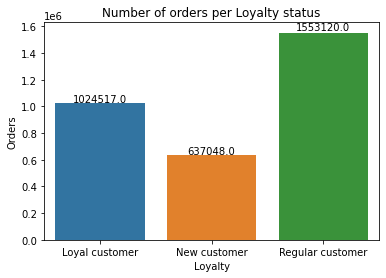

In [176]:
fig=sns.barplot(data=df_loyalty,x='loyalty_flag',y='order_id',errwidth=0)
fig.set(xlabel='Loyalty',ylabel='Orders',title="Number of orders per Loyalty status")
show_values(fig)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_per_loyalty.png'))


#### Most of the orders are made by Regular customers, followed by Loyal customers and lastly by New customers

### Scatterplot

#### Group the columns

In [112]:
df2=df.groupby('user_id').agg({'Age':['mean'],'income':['mean']})

In [75]:
df2

,Age,income
,mean,mean
user_id,,
1,31,40423
2,68,64940
3,33,93240
4,31,45435
5,75,115242
...,...,...
206205,38,99402
206206,25,75041


#### Create the scatterplot

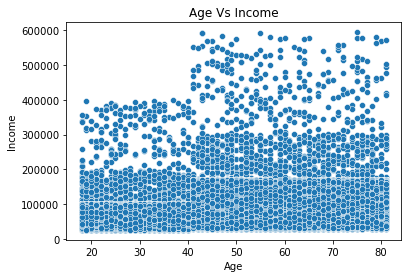

In [121]:
fig=sns.scatterplot(x=('Age', 'mean'),y=('income', 'mean'),data=df2)
fig.set(xlabel='Age',ylabel='Income',title="Age Vs Income")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_income.png'))

#### There is no relationship between Age and Income

### Line chart

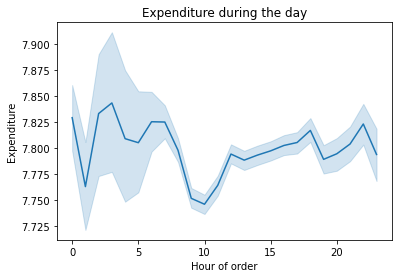

In [124]:
line=sns.lineplot(data=small,x='order_hour_of_day',y='prices')
line.set(xlabel='Hour of order',ylabel='Expenditure',title="Expenditure during the day")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_hours.png'))

In [180]:
df_expenditure=df.groupby('order_hour_of_day')['prices'].sum()

In [182]:
df_expenditure=pd.DataFrame(df_expenditure).reset_index()

In [195]:
df_expenditure

,order_hour_of_day,prices
0,0,1.708627e+06
1,1,9.029875e+05
2,2,5.409533e+05
3,3,4.013311e+05
4,4,4.172650e+05
...,...,...
19,19,9.805649e+06
20,20,7.613150e+06
21,21,6.209528e+06
22,22,4.957118e+06


In [196]:
df_expenditure.sort_values(('prices'),ascending=False)

,order_hour_of_day,prices
10,10,2.140000e+07
11,11,2.126192e+07
14,14,2.097967e+07
15,15,2.077724e+07
13,13,2.073493e+07
...,...,...
1,1,9.029875e+05
5,5,6.884399e+05
2,2,5.409533e+05
4,4,4.172650e+05


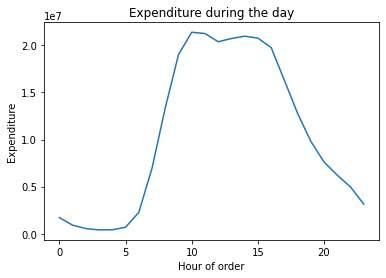

In [193]:
line=sns.lineplot(data=df_expenditure,x='order_hour_of_day',y='prices')
line.set(xlabel='Hour of order',ylabel='Expenditure',title="Expenditure during the day")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_hours.png'))

#### The peak hours are between 10:00 and 15:00